In [5]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # visualisation
from sklearn.model_selection import train_test_split # split the data into training and validation
from sklearn.metrics import classification_report # to get precision and recall
from sklearn.linear_model import LogisticRegression # algorithm to solve the problem statement
from sklearn.preprocessing import StandardScaler # scaling the data

In [10]:
# load the dataset
df = pd.read_csv("salarydata.csv")

In [12]:
# print the first 5 rows

target = df.pop('salary')
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


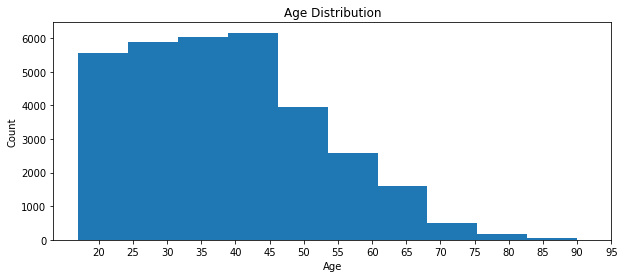

In [15]:
# check age distribution

plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] =(10,7)
plt.xticks(np.arange(20,100,5))
plt.title('Age Distribution')
plt.show()

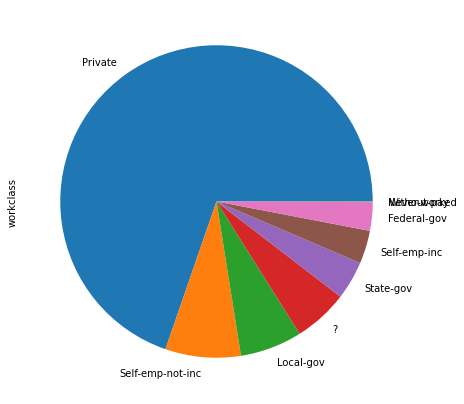

In [22]:
# check working class

df['workclass'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize'] = (7,10)
plt.show()

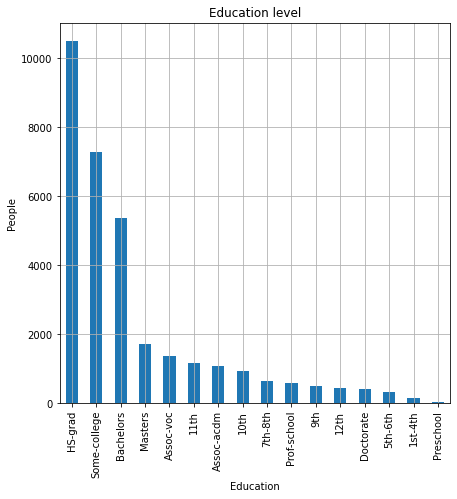

In [36]:
# check education 

df['education'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize'] = (7,7)
plt.xlabel('Education')
plt.ylabel('People')
plt.title('Education level')
plt.grid()
plt.show()

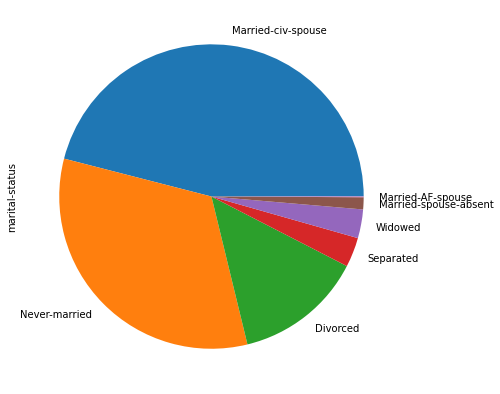

In [37]:
# check marital status
df['marital-status'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize'] = (7,4)
plt.show()

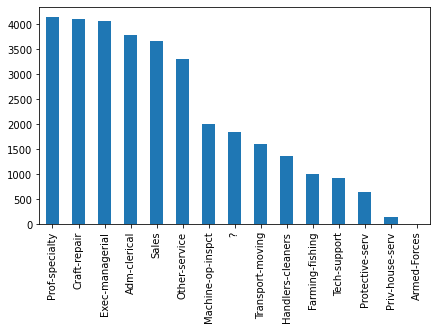

In [38]:
# checking occupation

df['occupation'].value_counts().plot(kind = 'bar')
plt.show()

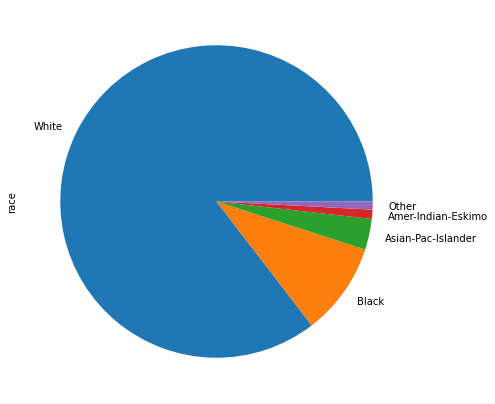

In [44]:
# checking ethinicity

df['race'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

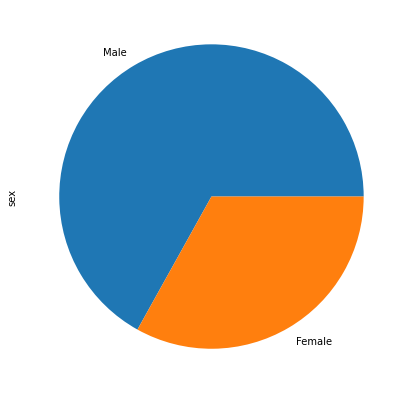

In [47]:
# checking gender

df['sex'].value_counts().plot(kind = 'pie')
plt.show()

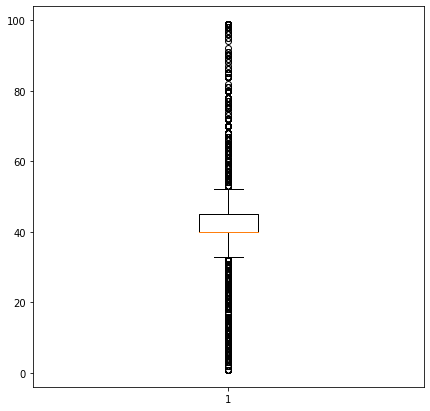

In [48]:
plt.boxplot(df['hours-per-week'])
plt.show()

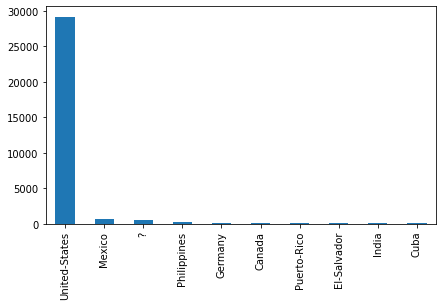

In [51]:
# checking country of origin

df['native-country'].value_counts().head(10).plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (7,4)
plt.show()

In [52]:
sorted(df.columns)

['age',
 'capital-gain',
 'capital-loss',
 'education',
 'education-num',
 'hours-per-week',
 'marital-status',
 'native-country',
 'occupation',
 'race',
 'relationship',
 'sex',
 'workclass']

In [53]:
# converting textual data to numeric

char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    df[c],label_mapping[c] = pd.factorize(df[c])

df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,0,0,13,0,0,0,0,0,2174,0,40,0
1,50,1,0,13,1,1,1,0,0,0,0,13,0
2,38,2,1,9,2,2,0,0,0,0,0,40,0
3,53,2,2,7,1,2,1,1,0,0,0,40,0
4,28,2,0,13,1,3,2,1,1,0,0,40,1


In [54]:
# removing columns with lesser significance [capital-gain,capital-loss]

df = df.drop(columns=['capital-gain','capital-loss'])

df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,0,0,13,0,0,0,0,0,40,0
1,50,1,0,13,1,1,1,0,0,13,0
2,38,2,1,9,2,2,0,0,0,40,0
3,53,2,2,7,1,2,1,1,0,40,0
4,28,2,0,13,1,3,2,1,1,40,1


In [55]:
# since this is a binary classification we will use logistic regression

#normalize data

scaler = StandardScaler()
df = scaler.fit_transform(df.values)

#splitting the data
x_train,x_test,y_train,y_test = train_test_split(df, target)

clf = LogisticRegression().fit(x_train,y_train)
pred = clf.predict(x_test)

print ('TRAINING COMPLETED')

TRAINING COMPLETED


In [56]:
# generate report

print (classification_report(y_test, pred))

              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88      6192
        >50K       0.66      0.39      0.49      1949

    accuracy                           0.81      8141
   macro avg       0.75      0.66      0.69      8141
weighted avg       0.79      0.81      0.79      8141

